In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

from wordcloud import WordCloud

from sklearn.preprocessing import LabelEncoder

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
df = '/content/drive/MyDrive/DataSet/2020년_산업중분류(56_음식점 및 주점업)_CSV(항목명포함).csv'
data = pd.read_csv(df, sep=',', encoding='cp949')
data

<ipython-input-53-523f69f34313>:2: DtypeWarning: Columns (0,4,5,6,7,8,14,15,16,17,19,20,21,22,23,24,25,26,27,31,32,33,34,35,36,37,38,39,40,41,42,43,45,46,47,49,50,51,52,53) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(df, sep=',', encoding='cp949')


,기준연도,행정구역시도코드,행정구역시군구코드,행정구역읍면동코드,사업체대표자성별코드,창설연도,창설월,조직형태코드,사업체구분코드,자산총액,...,건물_합계면적,일일평균영업시간코드,온라인쇼핑거래존재여부,전체매출액_온라인쇼핑거래액비중,디지털플랫폼이용여부,무인결제기기도입여부,객석여부,객석수,배달택배판매여부,대량대체여부
0,2020,11,10,53,1,1992,11,1,NaN,NaN,...,190,5,2,NaN,2,2,1,130.0,1,N
1,2020,11,10,53,1,1994,12,1,NaN,NaN,...,50,2,1,1.0,1,2,1,30.0,1,N
2,2020,11,10,53,1,1994,5,1,NaN,NaN,...,116,2,2,NaN,2,2,2,NaN,2,Y
3,2020,11,10,53,1,1996,11,2,1.0,504.0,...,43,4,1,8.0,1,1,1,16.0,1,N
4,2020,11,10,53,1,1997,5,1,NaN,NaN,...,72,2,2,NaN,2,2,1,19.0,2,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804168,2020,39,20,62,2,2020,7,1,NaN,NaN,...,17,4,2,NaN,2,2,2,NaN,2,Y
804169,2020,39,20,62,2,2020,7,1,NaN,NaN,...,660,5,2,NaN,2,2,1,80.0,2,N
804170,2020,39,20,62,2,2020,8,1,NaN,NaN,...,50,2,2,NaN,2,2,1,11.0,2,Y
804171,2020,39,20,62,2,2020,8,1,NaN,NaN,...,33,1,1,40.0,1,2,1,24.0,2,N


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 30 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (34.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121658 files and direc

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

In [ ]:
# for i in range(len(data['기준연도'])):
#     if data.T[i].isnull().sum().any():
#         nulllist.append(data.T[i].isnull().sum())

for i, row in tqdm(data.iterrows()):
    data.loc[i, 'null개수'] = row.isnull().sum()

0it [00:00, ?it/s]

In [ ]:
data['null개수'].describe()

count    804173.000000
mean         20.601596
std           3.259799
min           7.000000
25%          18.000000
50%          22.000000
75%          23.000000
max          27.000000
Name: null개수, dtype: float64

In [ ]:
data['null개수'].value_counts()

23.0    237340
20.0     80115
24.0     79177
19.0     65194
22.0     56303
18.0     54723
16.0     42868
17.0     42263
21.0     37913
25.0     31270
15.0     27120
14.0     19922
13.0     12429
26.0      7310
12.0      4913
11.0      2923
10.0      1469
27.0       546
9.0        351
8.0         18
7.0          6
Name: null개수, dtype: int64

In [ ]:
data.loc[0].isnull().sum() # 실측값 42개, 결측치 13개

13

In [ ]:
data.loc[245544].isna().sum() # 실측값 39개, 결측치 16개

16

In [ ]:
data.loc[136764].isna().sum() # 문자열 32개, 실측값 5개, 결측치 18개

18

<ipython-input-6-71cce607005d>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x='null개수', shade=True)


<Axes: xlabel='null개수', ylabel='Density'>

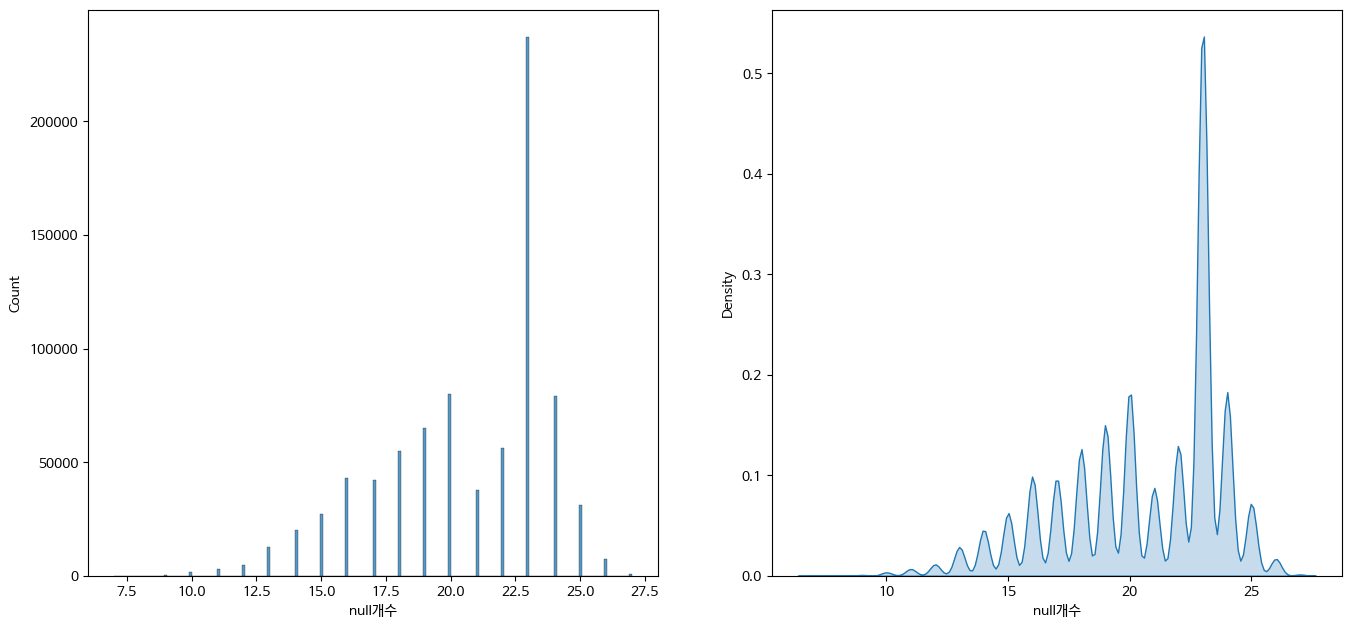

In [ ]:
plt.figure(figsize=(25, 25))
plt.subplot(3, 3, 1)
sns.histplot(data=data, x='null개수')

plt.subplot(3, 3, 2)
sns.kdeplot(data=data, x='null개수', shade=True)

<ipython-input-7-529e9fe49f2c>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=ax2, a=data['null개수'], bins=100, color="red", label='obseved')


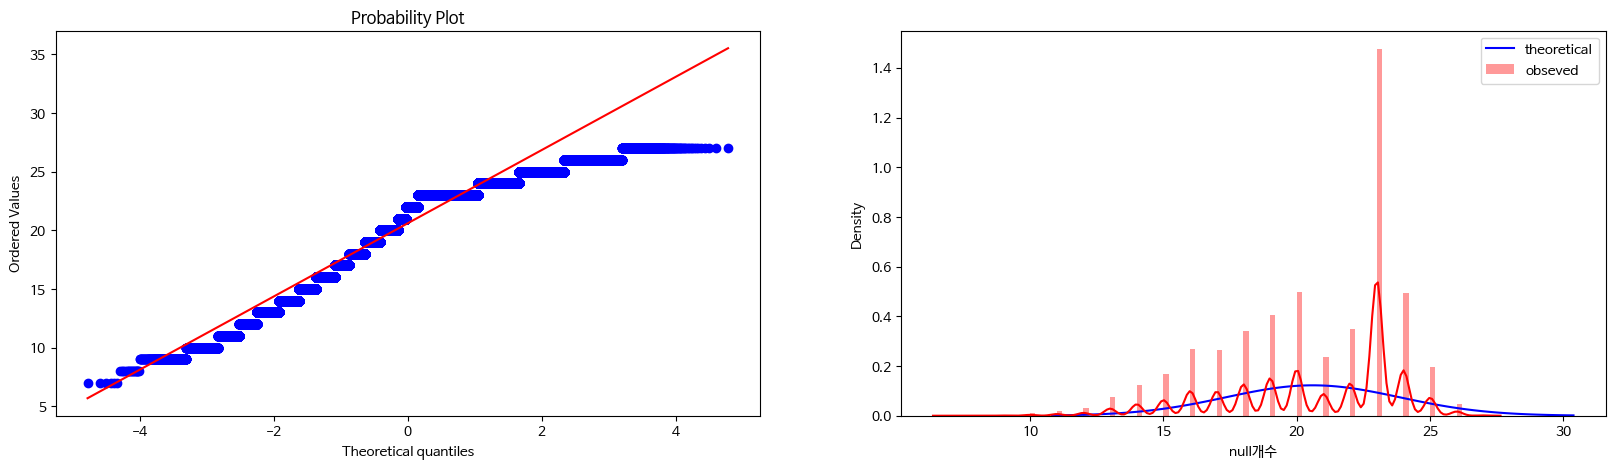

In [ ]:
import scipy.stats as stats

fig = plt.figure(figsize=(20 ,5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

stats.probplot(data['null개수'], dist=stats.norm, plot=ax1)

mu = data['null개수'].mean()
variance = data['null개수'].var()
sigma = variance ** 0.5
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
ax2.plot(x, stats.norm.pdf(x, mu, sigma), color="blue", label='theoretical')

sns.distplot(ax=ax2, a=data['null개수'], bins=100, color="red", label='obseved')
ax2.legend()

plt.show()

In [54]:
for i, row in tqdm(data.iterrows()):
    data.loc[i, 'str_count'] = row.str.contains(r'\*').sum()

0it [00:00, ?it/s]

In [ ]:
data['str_count'].describe()

count    804173.000000
mean          0.000815
std           0.153226
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: str_count, dtype: float64

In [ ]:
data['str_count'].value_counts()

0.0     804150
27.0         7
32.0         3
25.0         3
30.0         2
34.0         2
24.0         2
33.0         1
26.0         1
29.0         1
31.0         1
Name: str_count, dtype: int64

In [55]:
str_list = list(data['str_count'])

In [56]:
strlist = [i for i in str_list if i != 0]

In [57]:
strdata = pd.DataFrame({"strlist":strlist})

In [58]:
strdata['strlist'].describe()

count    23.000000
mean     28.478261
std       3.217418
min      24.000000
25%      26.500000
50%      27.000000
75%      31.500000
max      34.000000
Name: strlist, dtype: float64

In [59]:
strdata['strlist'].value_counts()

27.0    7
32.0    3
25.0    3
30.0    2
34.0    2
24.0    2
33.0    1
26.0    1
29.0    1
31.0    1
Name: strlist, dtype: int64

In [ ]:
strdata

,strlist
0,32.0
1,33.0
2,27.0
3,30.0
4,27.0
5,27.0
6,32.0
7,26.0
8,29.0
9,31.0


<ipython-input-49-6da6cfbcd36d>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=strdata, x='strlist', shade=True)


<Axes: xlabel='strlist', ylabel='Density'>

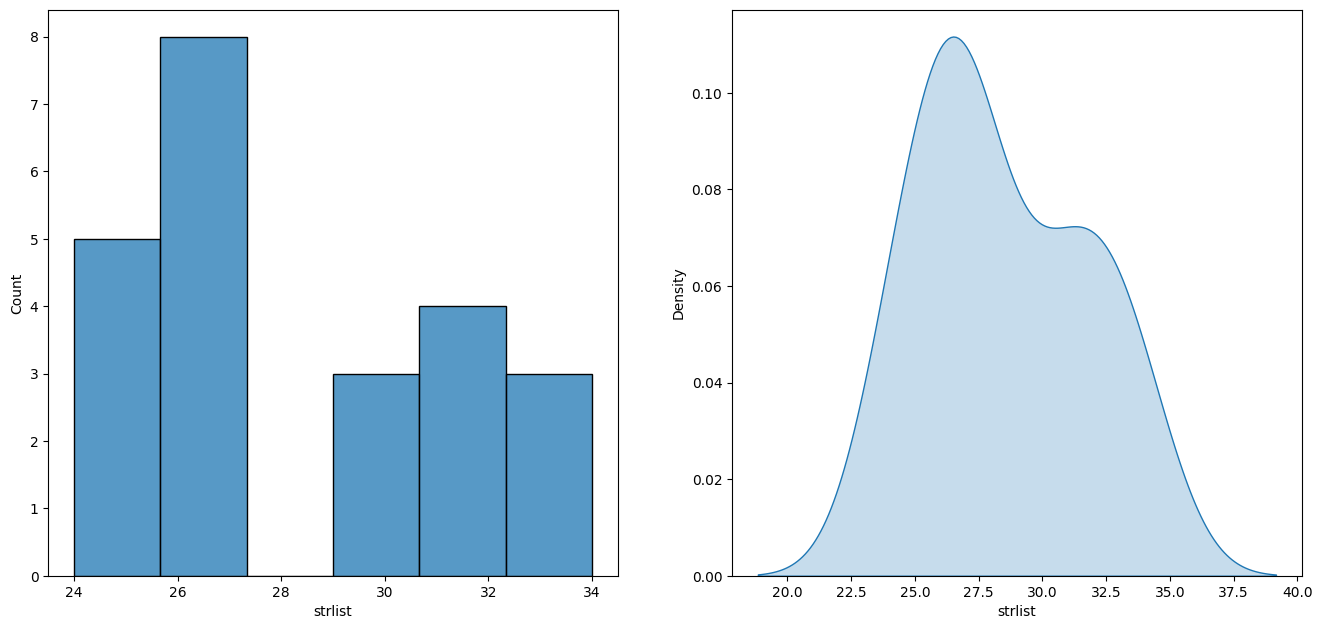

In [ ]:
plt.figure(figsize=(25, 25))
plt.subplot(3, 3, 1)
# plt.xlim(20, 40)
# plt.ylim(0, 10)
sns.histplot(data=strdata, x='strlist')

plt.subplot(3, 3, 2)
# plt.xlim(20, 40)
# plt.ylim(0, 0.0002)
sns.kdeplot(data=strdata, x='strlist', shade=True)

<ipython-input-30-a32a96d165bf>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=ax2, a=data['str_count'], bins=100, color="red", label='obseved')


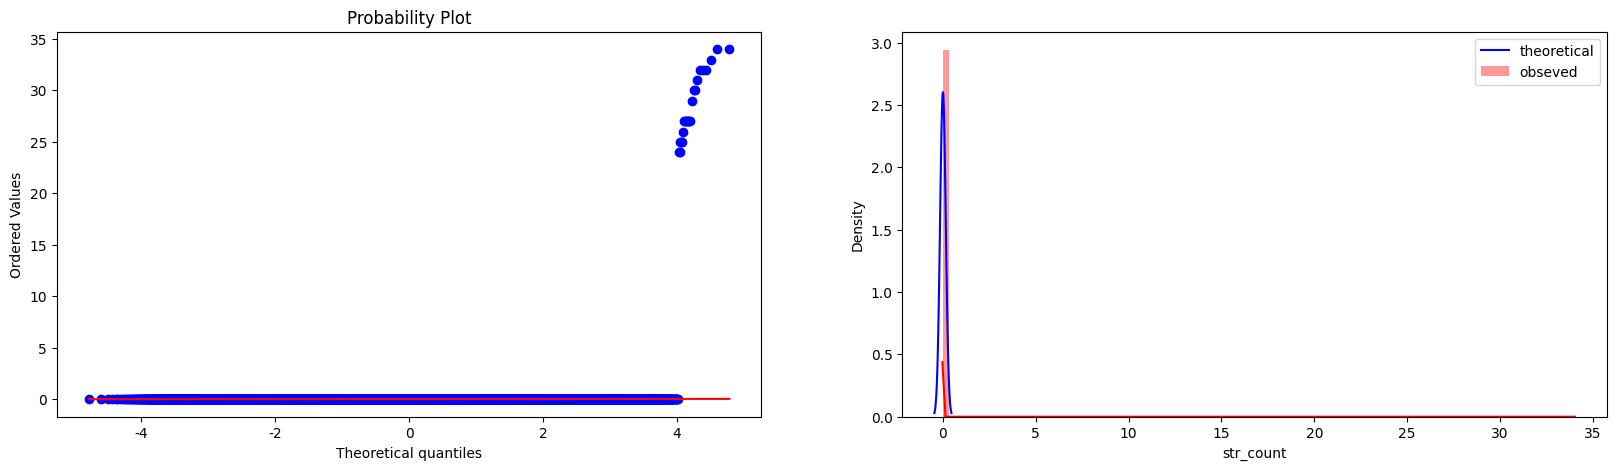

In [ ]:
import scipy.stats as stats

fig = plt.figure(figsize=(20 ,5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

stats.probplot(data['str_count'], dist=stats.norm, plot=ax1)

mu = data['str_count'].mean()
variance = data['str_count'].var()
sigma = variance ** 0.5
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
ax2.plot(x, stats.norm.pdf(x, mu, sigma), color="blue", label='theoretical')

sns.distplot(ax=ax2, a=data['str_count'], bins=100, color="red", label='obseved')
ax2.legend()

plt.show()

<ipython-input-50-918a5f952f0f>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=ax2, a=strdata['strlist'], bins=100, color="red", label='obseved')


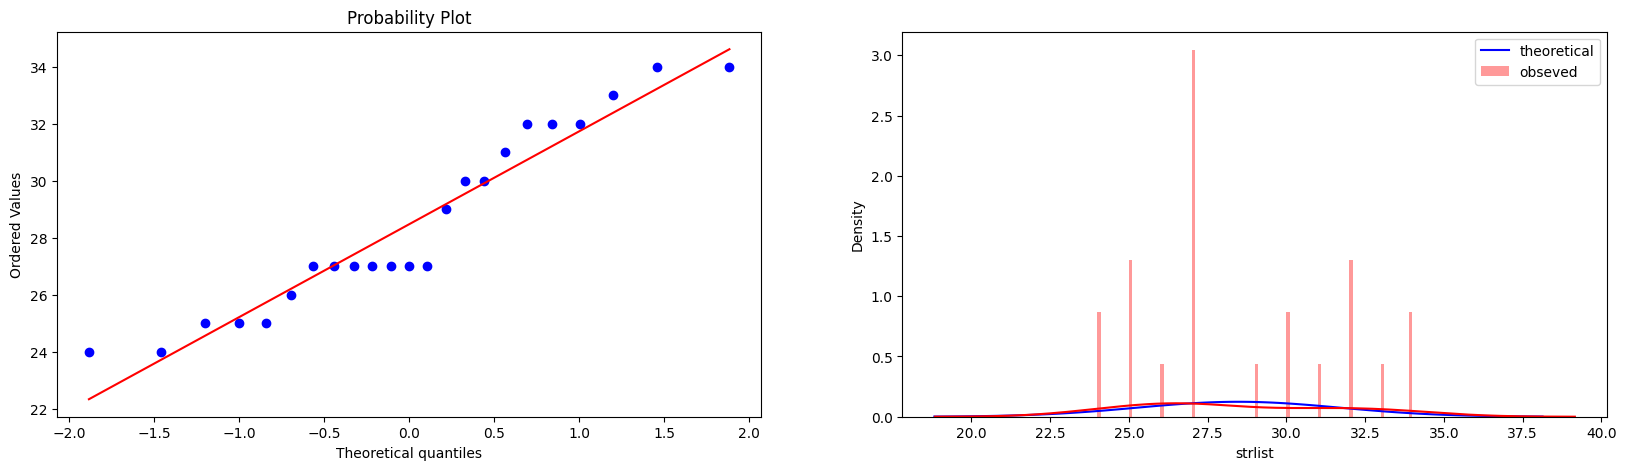

In [ ]:
import scipy.stats as stats

fig = plt.figure(figsize=(20 ,5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

stats.probplot(strdata['strlist'], dist=stats.norm, plot=ax1)

mu = strdata['strlist'].mean()
variance = strdata['strlist'].var()
sigma = variance ** 0.5
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
ax2.plot(x, stats.norm.pdf(x, mu, sigma), color="blue", label='theoretical')

sns.distplot(ax=ax2, a=strdata['strlist'], bins=100, color="red", label='obseved')
ax2.legend()

plt.show()

In [ ]:
from scipy import stats
stats.kstest(strdata['strlist'], 'norm') # p-value=0.0이므로 귀무가설 기각 => 정규분포를 따르지 않음

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=24.0, statistic_sign=-1)